In [1]:
#import packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
digits_dataset = datasets.load_digits()

In [3]:
print(digits_dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
digits_dataset.data.shape

(1797, 64)

In [6]:
digits_dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits_dataset.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
digits_dataset.images.shape

(1797, 8, 8)

In [9]:
digits_dataset.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

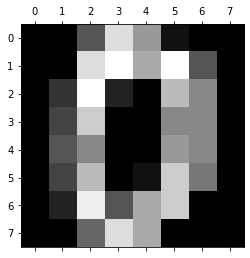

In [10]:
pl.gray()
pl.matshow(digits_dataset.images[0])
pl.show()

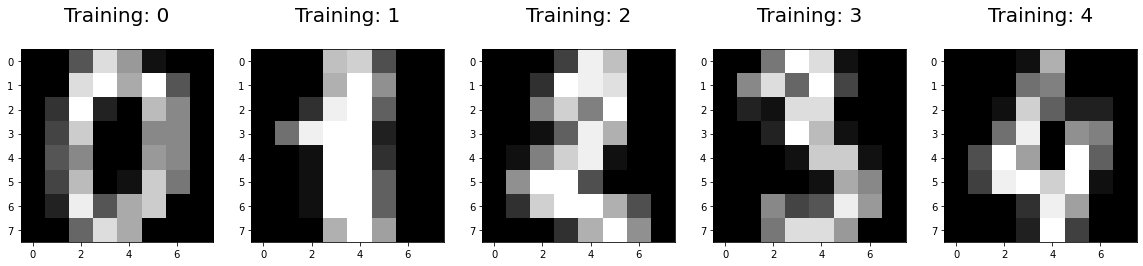

In [11]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits_dataset.data[0:5], digits_dataset.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Models Chosen:
##### 1. Logistic Regression 
##### 2. SVM
##### 3. Decision Tree
##### 4. KNN

### Splitting Data:
##### 70:30

In [12]:
x_train, x_test, y_train, y_test = train_test_split(digits_dataset.data, digits_dataset.target, test_size=0.3, random_state=17)

### 1. Logistic Regression:

In [13]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg.score(x_test, y_test)

0.9611111111111111

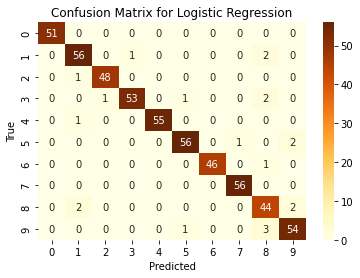

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.93      0.95      0.94        59
           2       0.98      0.98      0.98        49
           3       0.98      0.93      0.95        57
           4       1.00      0.98      0.99        56
           5       0.97      0.95      0.96        59
           6       1.00      0.98      0.99        47
           7       0.98      1.00      0.99        56
           8       0.85      0.92      0.88        48
           9       0.93      0.93      0.93        58

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

Accuracy=  96.11 %


In [14]:
lrCM=confusion_matrix(y_test,logreg_pred,labels=digits_dataset.target_names)
sns.heatmap(lrCM,annot=True,cmap="YlOrBr")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test,logreg_pred))
print("Accuracy= ",round(accuracy_score(y_test,logreg_pred)*100,2),"%")

##### Missclassified Images:

21
[15, 39, 53, 69, 70, 78, 142, 150, 262, 283, 315, 321, 347, 352, 361, 371, 387, 409, 435, 445, 467] 
 ****************************************************************************************************


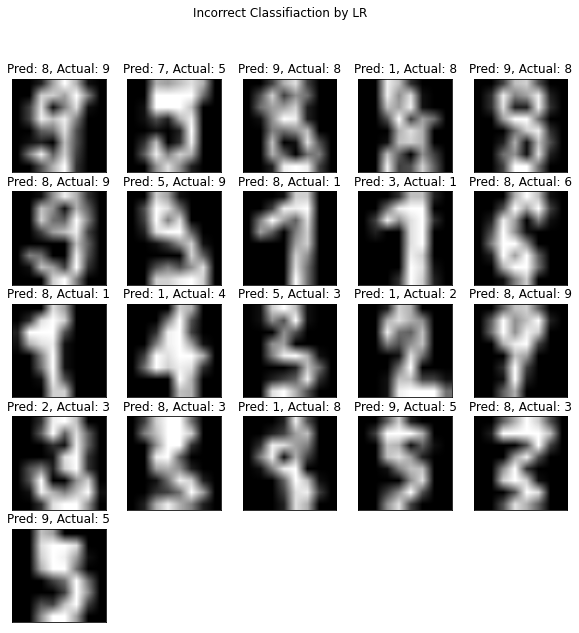

In [15]:
lri=0
lr_miss=[]
for label, predict in zip(y_test,logreg_pred):
    if label != predict:
        lr_miss.append(lri)
    lri+=1
print(len(lr_miss))
print(lr_miss,"\n","*"*100)
plt.figure(figsize=(10,10))
plt.suptitle("Incorrect Classifiaction by LR")
for plot_index, bad_index in enumerate(lr_miss[0:25]):
    p=plt.subplot(5,5,plot_index+1)
    p.imshow(x_test[bad_index].reshape(8,8), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_xticks(())
    p.set_yticks(())
    p.set_title(f'Pred: {logreg_pred[bad_index]}, Actual: {y_test[bad_index]}')
plt.show()

### 2. Support Vector Machine:

In [16]:
svclf = svm.SVC(gamma=0.001)
svclf.fit(x_train,y_train)
sv_pred=svclf.predict(x_test)
svclf.score(x_test, y_test)

0.9851851851851852

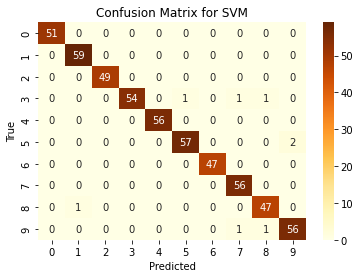

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      1.00      0.99        59
           2       1.00      1.00      1.00        49
           3       1.00      0.95      0.97        57
           4       1.00      1.00      1.00        56
           5       0.98      0.97      0.97        59
           6       1.00      1.00      1.00        47
           7       0.97      1.00      0.98        56
           8       0.96      0.98      0.97        48
           9       0.97      0.97      0.97        58

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Accuracy=  98.52 %


In [17]:
svCM=confusion_matrix(y_test,sv_pred,labels=digits_dataset.target_names)
sns.heatmap(svCM,annot=True,cmap="YlOrBr")
plt.title("Confusion Matrix for SVM")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test,sv_pred))
print("Accuracy= ",round(accuracy_score(y_test,sv_pred)*100,2),"%")

##### Misclassified Images:

8
[15, 39, 75, 243, 361, 387, 409, 467] 
 ****************************************************************************************************


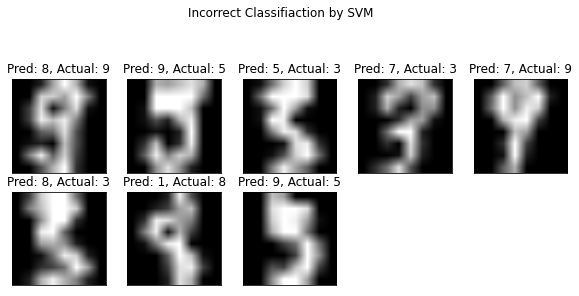

In [18]:
svi=0
sv_miss=[]
for label, predict in zip(y_test,sv_pred):
    if label != predict:
        sv_miss.append(svi)
    svi+=1
print(len(sv_miss))
print(sv_miss,"\n","*"*100)
plt.figure(figsize=(10,10))
plt.suptitle("Incorrect Classifiaction by SVM")
for plot_index, bad_index in enumerate(sv_miss[0:8]):
    p=plt.subplot(5,5,plot_index+1)
    p.imshow(x_test[bad_index].reshape(8,8), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_xticks(())
    p.set_yticks(())
    p.set_title(f'Pred: {sv_pred[bad_index]}, Actual: {y_test[bad_index]}')
plt.show()

### 3. Decision Tree:

In [19]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(x_train, y_train)
tree_pred=tree.predict(x_test)
tree.score(x_test, y_test)

0.6666666666666666

### 4. K-Nearest Neighbors:

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train);
knn_pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.9814814814814815

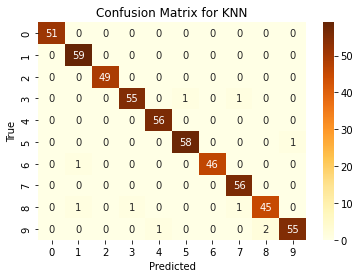

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.97      1.00      0.98        59
           2       1.00      1.00      1.00        49
           3       0.98      0.96      0.97        57
           4       0.98      1.00      0.99        56
           5       0.98      0.98      0.98        59
           6       1.00      0.98      0.99        47
           7       0.97      1.00      0.98        56
           8       0.96      0.94      0.95        48
           9       0.98      0.95      0.96        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Accuracy=  98.15 %


In [21]:
knnCM=confusion_matrix(y_test,knn_pred,labels=digits_dataset.target_names)
sns.heatmap(knnCM,annot=True,cmap="YlOrBr")
plt.title("Confusion Matrix for KNN")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test,knn_pred))
print("Accuracy= ",round(accuracy_score(y_test,knn_pred)*100,2),"%")

10
[15, 53, 75, 96, 240, 243, 283, 361, 409, 467] 
 ****************************************************************************************************


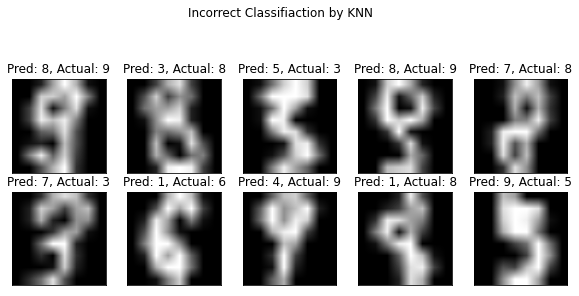

In [22]:
knni=0
knn_miss=[]
for label, predict in zip(y_test,knn_pred):
    if label != predict:
        knn_miss.append(knni)
    knni+=1
print(len(knn_miss))
print(knn_miss,"\n","*"*100)
plt.figure(figsize=(10,10))
plt.suptitle("Incorrect Classifiaction by KNN")
for plot_index, bad_index in enumerate(knn_miss[0:10]):
    p=plt.subplot(5,5,plot_index+1)
    p.imshow(x_test[bad_index].reshape(8,8), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_xticks(())
    p.set_yticks(())
    p.set_title(f'Pred: {knn_pred[bad_index]}, Actual: {y_test[bad_index]}')
plt.show()

In [23]:
num1=round(accuracy_score(y_test,logreg_pred)*100,2)
num2=round(accuracy_score(y_test,sv_pred)*100,2)
num3=round(accuracy_score(y_test,knn_pred)*100,2)
if (num1 >= num2) and (num1 >= num3):
    best = num1
    mod = "Logistic Regression"
elif (num2 >= num1) and (num2 >= num3):
    best = num2
    mod = "Support Vector Machine"
else:
    best = num3
    mod = "K-Nearest Neighbor"

print(f'The best model is "{mod}" with accuracy of "{best}"')


The best model is "Support Vector Machine" with accuracy of "98.52"
